In [32]:
import os
import numpy as np
import scipy.misc as misc
import skimage.measure as measure
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from net import Net
from dataset import Dataset
import matplotlib.pyplot as plt

In [54]:
net = Net(4).cuda()
net.load_state_dict(torch.load('checkpoint/sr_1000.pth'))


In [16]:
test_data = Dataset(train=False,  scale = 4,size = 100 , data_root = './data' )
#test_loader = torch.utils.data.DataLoader(dataset=test_data,
#                                              batch_size=64, 
#                                              shuffle=True)

In [55]:
loader = DataLoader(test_data,
                            batch_size=1,
                            num_workers=1,
                            shuffle=False, drop_last=False)
net.eval()
image = []
high_image = []
#result = net(Variable(loader[3]))
for step, inputs in enumerate(loader):
        image_lr = Variable(inputs[1], requires_grad=False).cuda()
        image_hr = Variable(inputs[0], requires_grad=False).cuda()
        
        
        image_sr = net(image_lr)
        
        image_hr = image_hr[0].cpu().mul(255).clamp(0, 255).byte().permute(1, 2, 0).data.numpy()
        high_image.append(image_hr)
        
        image_sr = image_sr[0].cpu().mul(255).clamp(0, 255).byte().permute(1, 2, 0).data.numpy()
        image.append(image_sr)

select = image[7]
original = high_image[7]


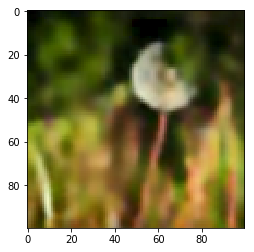

In [56]:
plt.imshow(select)
plt.show()

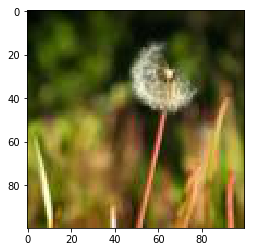

In [57]:
plt.imshow(original)
plt.show()